<a href="https://www.kaggle.com/code/sanandachowdhury/godaddy?scriptVersionId=115572269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [2]:
# Read data
census_starter =  pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')
sample_submission = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv')
test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')

In [3]:
print('Train Data')

train.head(10)

Train Data


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257


In [4]:
print('''
Train Data Information:

Number of counties = {}

Start Date = {}

End Date = {}

Lowest microbusiness density = {}

Highest microbusiness density = {}

Lowest raw count of microbusinesses in a county = {}

Highest raw count of microbusinesses in a county = {}
'''.format(train['cfips'].nunique(),
            train['first_day_of_month'].min(),
            train['first_day_of_month'].max(),
            train['microbusiness_density'].min(),
            train['microbusiness_density'].max(),
            train['active'].min(),
            train['active'].max()
          )
     )


Train Data Information:

Number of counties = 3135

Start Date = 2019-08-01

End Date = 2022-10-01

Lowest microbusiness density = 0.0

Highest microbusiness density = 284.34003

Lowest raw count of microbusinesses in a county = 0

Highest raw count of microbusinesses in a county = 1167744



In [5]:
print('Census Data')

census_starter.head(6)

Census Data


,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
5,49.4,58.9,60.1,60.6,59.4,1011,6.6,7.4,7.4,6.1,...,0.4,0.3,0.5,0.3,0.2,29655,32152.0,37785,33866.0,29063.0


In [6]:
print('''
Census Data Information:

Number of counties = {}

'''.format(census_starter['cfips'].nunique(),
          )
     )


Census Data Information:

Number of counties = 3142




In [7]:
# Data Preparation

cs_bb = census_starter[['cfips','pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021']]
cs_bb.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_bb = pd.melt(cs_bb, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_bb.columns=['cfips','year','pct_bb']
cs_bb['year'] = cs_bb['year'].astype(int)

cs_college = census_starter[['cfips','pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021']]
cs_college.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_college = pd.melt(cs_college, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_college.columns=['cfips','year','pct_college']
cs_college['year'] = cs_college['year'].astype(int)

cs_foreign_born = census_starter[['cfips','pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021']]
cs_foreign_born.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_foreign_born = pd.melt(cs_foreign_born, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_foreign_born.columns=['cfips','year','pct_foreign_born']
cs_foreign_born['year'] = cs_foreign_born['year'].astype(int)

cs_it_workers = census_starter[['cfips','pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021']]
cs_it_workers.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_it_workers = pd.melt(cs_it_workers, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_it_workers.columns=['cfips','year','pct_it_workers']
cs_it_workers['year'] = cs_it_workers['year'].astype(int)

cs_median_hh_inc = census_starter[['cfips','median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']]
cs_median_hh_inc.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_median_hh_inc = pd.melt(cs_median_hh_inc, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_median_hh_inc.columns=['cfips','year','pct_median_hh_inc']
cs_median_hh_inc['year'] = cs_median_hh_inc['year'].astype(int)

train['first_day_of_month'] = pd.to_datetime(train['first_day_of_month'])

train['year'] = train['first_day_of_month'].apply(lambda x: x.year)
train['month'] = train['first_day_of_month'].apply(lambda x: x.month)

train = pd.merge(train,cs_bb, how='left', on=['cfips', 'year'] )
train = pd.merge(train,cs_college, how='left', on=['cfips', 'year'] )
train = pd.merge(train,cs_foreign_born, how='left', on=['cfips', 'year'] )
train = pd.merge(train,cs_it_workers, how='left', on=['cfips', 'year'] )
train = pd.merge(train,cs_median_hh_inc, how='left', on=['cfips', 'year'] )



In [8]:
# 5 counties with high 'average microbusiness density'

print('5 counties with high "average microbusiness density"')

mean_md_by_cfips = train.groupby('cfips')['microbusiness_density'].mean().reset_index()
mean_md_by_cfips.sort_values(by= 'microbusiness_density', ascending=False).head(5).reset_index().drop('index', axis=1)

5 counties with high "average microbusiness density"


,cfips,microbusiness_density
0,32510,87.196625
1,56033,73.510410
2,8105,60.942899
3,41061,54.522958
4,16021,46.730638


In [9]:
# 5 counties with low 'average microbusiness density'

print('5 counties with low "average microbusiness density"')

mean_md_by_cfips = train.groupby('cfips')['microbusiness_density'].mean().reset_index()
mean_md_by_cfips.sort_values(by= 'microbusiness_density', ascending=True).head(5).reset_index().drop('index', axis=1)

5 counties with low "average microbusiness density"


,cfips,microbusiness_density
0,28055,0.063846
1,13101,0.073227
2,51081,0.164327
3,29067,0.207466
4,46137,0.313856


In [10]:
# Mean Microbusiness Density of all counties
plt.figure(figsize=(10,5))
train.groupby('first_day_of_month')['microbusiness_density'].mean().reset_index().iplot(kind='line',x='first_day_of_month', y='microbusiness_density', title='Mean Microbusiness Density Curve');

<Figure size 720x360 with 0 Axes>

In [11]:
#Change value of cfips to get graph for different county
cfips=32510
county = train[train['cfips'] == cfips]['county'].unique()[0]

In [12]:
# Microbusiness Density for particular county

plot_01 = train[train['cfips']==cfips].groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plot_01.iplot(kind = 'line', 
              x='first_day_of_month', 
              y='microbusiness_density', 
              title ='Microbusiness Density for : {} (cfips : {})'.format(county, cfips))

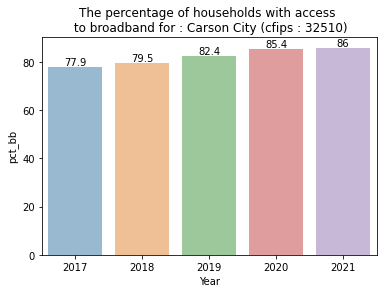

In [13]:
#The percentage of households with access to broadband

plot_02 = cs_bb[cs_bb['cfips'] == cfips].groupby('year')['pct_bb'].mean().reset_index()
plot_02 = sns.barplot(x = plot_02['year'], y=plot_02['pct_bb'], alpha=0.5)
plot_02.bar_label(plot_02.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_bb')
plt.title('The percentage of households with access \n to broadband for : {} (cfips : {})'.format(county, cfips));

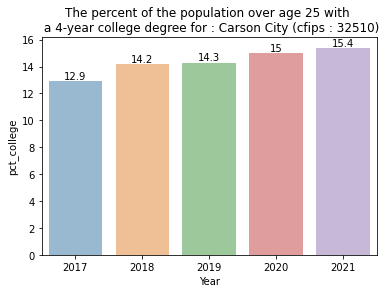

In [14]:
#The percent of the population over age 25 with a 4-year college degree

plot_03 = cs_college[cs_college['cfips'] == cfips].groupby('year')['pct_college'].mean().reset_index()
plot_03 = sns.barplot(x = plot_03['year'], y=plot_03['pct_college'], alpha=0.5)
plot_03.bar_label(plot_03.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_college')
plt.title('The percent of the population over age 25 with \n a 4-year college degree for : {} (cfips : {})'.format(county, cfips));

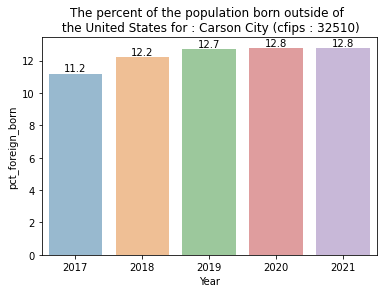

In [15]:
#The percent of the population born outside of the United States

plot_04 = cs_foreign_born[cs_foreign_born['cfips'] == cfips].groupby('year')['pct_foreign_born'].mean().reset_index()
plot_04 = sns.barplot(x = plot_04['year'], y=plot_04['pct_foreign_born'], alpha=0.5)
plot_04.bar_label(plot_04.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_foreign_born')
plt.title('The percent of the population born outside of \n the United States for : {} (cfips : {})'.format(county, cfips));

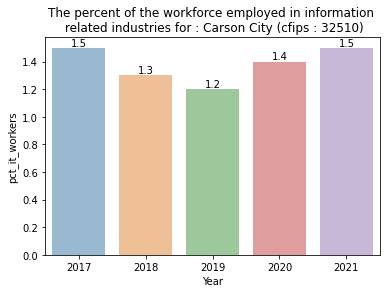

In [16]:
#TThe percent of the workforce employed in information related industries

plot_05 = cs_it_workers[cs_it_workers['cfips'] == cfips].groupby('year')['pct_it_workers'].mean().reset_index()
plot_05 = sns.barplot(x = plot_05['year'], y=plot_05['pct_it_workers'], alpha=0.5)
plot_05.bar_label(plot_05.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_it_workers')
plt.title('The percent of the workforce employed in information \n related industries for : {} (cfips : {})'.format(county, cfips));

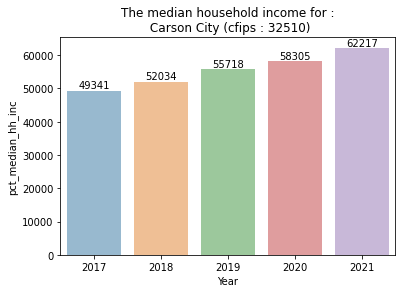

In [17]:
#The median household income

plot_06 = cs_median_hh_inc[cs_median_hh_inc['cfips'] == cfips].groupby('year')['pct_median_hh_inc'].mean().reset_index()
plot_06 = sns.barplot(x = plot_06['year'], y=plot_06['pct_median_hh_inc'], alpha=0.5)
plot_06.bar_label(plot_06.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_median_hh_inc')
plt.title('The median household income for :\n {} (cfips : {})'.format(county, cfips));

In [18]:
#Change value of cfips to get graph for different county
cfips=46137
county = train[train['cfips'] == cfips]['county'].unique()[0]

In [19]:
# Microbusiness Density for particular county

plot_01 = train[train['cfips']==cfips].groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plot_01.iplot(kind = 'line', 
              x='first_day_of_month', 
              y='microbusiness_density', 
              title ='Microbusiness Density for : {} (cfips : {})'.format(county, cfips))

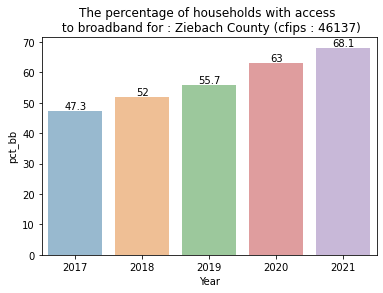

In [20]:
#The percentage of households with access to broadband

plot_02 = cs_bb[cs_bb['cfips'] == cfips].groupby('year')['pct_bb'].mean().reset_index()
plot_02 = sns.barplot(x = plot_02['year'], y=plot_02['pct_bb'], alpha=0.5)
plot_02.bar_label(plot_02.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_bb')
plt.title('The percentage of households with access \n to broadband for : {} (cfips : {})'.format(county, cfips));

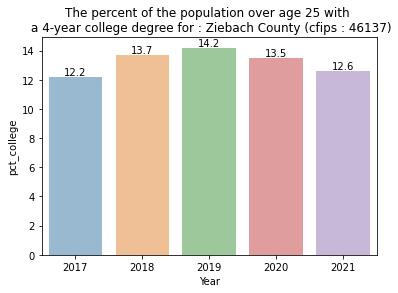

In [21]:
#The percent of the population over age 25 with a 4-year college degree

plot_03 = cs_college[cs_college['cfips'] == cfips].groupby('year')['pct_college'].mean().reset_index()
plot_03 = sns.barplot(x = plot_03['year'], y=plot_03['pct_college'], alpha=0.5)
plot_03.bar_label(plot_03.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_college')
plt.title('The percent of the population over age 25 with \n a 4-year college degree for : {} (cfips : {})'.format(county, cfips));

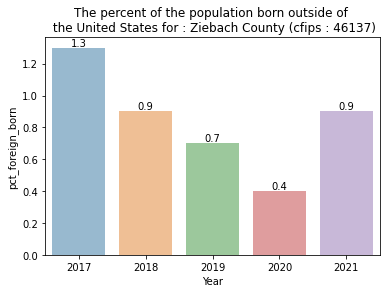

In [22]:
#The percent of the population born outside of the United States

plot_04 = cs_foreign_born[cs_foreign_born['cfips'] == cfips].groupby('year')['pct_foreign_born'].mean().reset_index()
plot_04 = sns.barplot(x = plot_04['year'], y=plot_04['pct_foreign_born'], alpha=0.5)
plot_04.bar_label(plot_04.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_foreign_born')
plt.title('The percent of the population born outside of \n the United States for : {} (cfips : {})'.format(county, cfips));

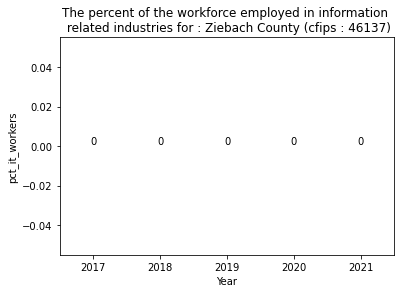

In [23]:
#TThe percent of the workforce employed in information related industries

plot_05 = cs_it_workers[cs_it_workers['cfips'] == cfips].groupby('year')['pct_it_workers'].mean().reset_index()
plot_05 = sns.barplot(x = plot_05['year'], y=plot_05['pct_it_workers'], alpha=0.5)
plot_05.bar_label(plot_05.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_it_workers')
plt.title('The percent of the workforce employed in information \n related industries for : {} (cfips : {})'.format(county, cfips));

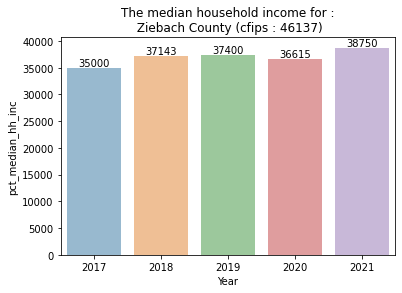

In [24]:
#The median household income

plot_06 = cs_median_hh_inc[cs_median_hh_inc['cfips'] == cfips].groupby('year')['pct_median_hh_inc'].mean().reset_index()
plot_06 = sns.barplot(x = plot_06['year'], y=plot_06['pct_median_hh_inc'], alpha=0.5)
plot_06.bar_label(plot_06.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_median_hh_inc')
plt.title('The median household income for :\n {} (cfips : {})'.format(county, cfips));

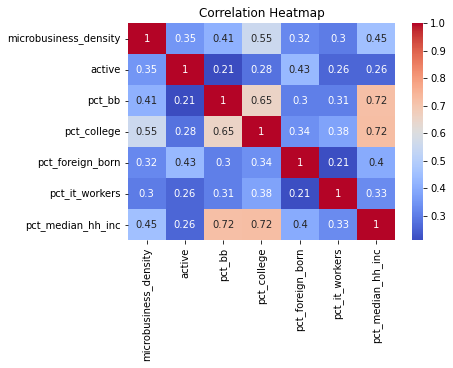

In [25]:
# Correlation Heatmap

corr_df = train.groupby('cfips')['microbusiness_density','active', 'pct_bb','pct_college','pct_foreign_born','pct_it_workers','pct_median_hh_inc'].mean().reset_index()
sns.heatmap(corr_df.drop('cfips',axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

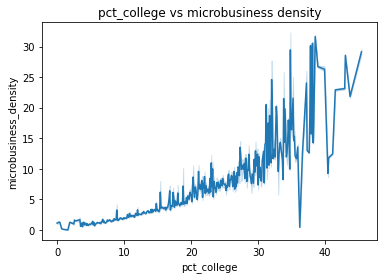

In [26]:
sns.lineplot(data=train, x='pct_college', y='microbusiness_density')
plt.title('pct_college vs microbusiness density');

In [27]:
sample_submission.to_csv('submission.csv',index=None)